<a href="https://colab.research.google.com/github/rgroesman/67410_data_science_ii/blob/main/67410_Rodolfo_Groesman_Entrega_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PROYECTO FINAL
#### Primera entrega - 10/06/2025
**Autor**: Rodolfo Groesman  
**Fecha de actualización**: 13/08/2025

## 1. Introducción
Desde hace más de 25 años, la Secretaría de Salud de México ha trabajado en generar datos confiables sobre la salud de la población, sus tendencias y la percepción de los servicios de salud. En este proyecto, usamos datos de la **Encuesta Nacional de Salud y Nutrición (ENSANUT) 2022** para analizar factores relacionados con el riesgo de hipertensión arterial.

## 2. Descripción Temática de los Datos
El dataset contiene información biométrica de pacientes en México, incluyendo variables como sexo, edad, concentración de hemoglobina, colesterol (HDL, LDL, total), glucosa, peso, estatura, medida de cintura, entre otros. La variable objetivo, `riesgo_hipertension`, indica si un paciente está en riesgo de hipertensión ("yes" o "no"). Este análisis busca identificar patrones relacionados con el riesgo de hipertensión, especialmente por rangos de edad.

## 3. Alcance
Analizar los datos mediante visualizaciones y estadísticas para validar la hipótesis, modelar el problema como uno de Machine Learning, entrenar modelos, realizar ingeniería de atributos, normalizar variables y seleccionar el modelo con mejor desempeño.

## 4. Hipótesis
**El objetivo principal es la segmentación de pacientes analizados según su hipertensión arterial por edad dentro del territorio mexicano. En base a su clasificación según el "riesgo_hipertension" calculado, definir rangos de edad, y sobre ellos trabajar, podrá observarse que, dentro del rango de edad en donde la productividad de un ser humano dentro del ámbito laboral es mayor, mayor es el riesgo de poseer hipertensión arterial. Por lo tanto, se espera que el riesgo sea mayor en el rango de edad productiva (21-60 años, en pares de 21-40 y 41-60 es otra posibilidad), donde la actividad laboral es más intensa.**

## 5. Contexto Analítico
Este proyecto extiende el análisis exploratorio inicial (EDA) para modelar el riesgo de hipertensión como un problema de **clasificación supervisada**. Entrenaremos tres modelos simples, realizaremos ingeniería de atributos y normalización, y seleccionaremos el mejor modelo basado en métricas fáciles de entender.

## 6. Carga de Librerías y Datos
Cargamos las librerías necesarias y el dataset desde la URL proporcionada. Eliminamos la columna `FOLIO_I` por no ser relevante.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
%matplotlib inline
sns.set(style="whitegrid", palette="deep")

# Cargar el dataset y más
#### Pasos:
##### 1 - Tomar archivo CSV base "Hipertensión Arterial Mexico" desde un raw en GitHub de mi repositorio público.
##### 2 - Cargar el archivo CSV en un DataFrame (de Panda)
##### 3 - Eliminar una columna por que no tiene utilidad

In [3]:
url = "https://raw.githubusercontent.com/rgroesman/67410_data_science_ii/refs/heads/main/Hipertension_Arterial_Mexico_RAW_FILE_1.csv"
data_base = pd.read_csv(url, sep=';')
data = data_base.drop('FOLIO_I', axis=1)
print("Primeras filas del dataset:")
data.head()

Primeras filas del dataset:


,sexo,edad,concentracion_hemoglobina,temperatura_ambiente,valor_acido_urico,valor_albumina,valor_colesterol_hdl,valor_colesterol_ldl,valor_colesterol_total,valor_creatina,...,segundamedicion_peso,segundamedicion_estatura,distancia_rodilla_talon,circunferencia_de_la_pantorrilla,segundamedicion_cintura,tension_arterial,sueno_horas,actividad_total,riesgo_hipertension,rango_edad
0,f,41,14.2,22,4.8,4.0,34,86.0,139,0.58,...,64.70,154.0,48.5,33.5,0.0,107,4,120,yes,41_60
1,f,65,14.1,9,4.4,3.8,73,130.0,252,0.62,...,96.75,152.2,44.5,41.1,113.7,104,2,240,no,61_80
2,f,68,14.2,22,4.8,4.0,34,86.0,139,0.58,...,68.70,144.8,42.3,37.8,103.7,105,1,480,no,61_80
3,m,35,15.7,11,6.5,4.1,49,107.0,203,0.91,...,64.70,154.0,48.5,33.5,0.0,117,5,275,yes,21_40
4,f,65,12.7,7,4.2,4.2,41,76.0,145,0.71,...,97.15,161.3,49.6,42.0,118.9,123,2,255,no,61_80


## 7. Exploración de Datos (EDA) - Continuación
Verificamos la estructura del dataset, valores únicos y datos faltantes, como en el TP original.

# Primera visualización de los datos

In [16]:
# Mostrar la data por consola
print("Data por consola:")
print(data)

Data por consola:
     sexo  edad  concentracion_hemoglobina  temperatura_ambiente  \
0       f    41                       14.2                    22   
1       f    65                       14.1                     9   
2       f    68                       14.2                    22   
3       m    35                       15.7                    11   
4       f    65                       12.7                     7   
...   ...   ...                        ...                   ...   
4358    f    62                       14.2                    22   
4359    m    39                       14.2                    22   
4360    f    69                       15.9                    11   
4361    m    67                       17.6                    14   
4362    f    56                       14.2                    22   

      valor_acido_urico  valor_albumina  valor_colesterol_hdl  \
0                   4.8             4.0                    34   
1                   4.4            

In [17]:
# Mostar primeros registros de la data
data.head()

,sexo,edad,concentracion_hemoglobina,temperatura_ambiente,valor_acido_urico,valor_albumina,valor_colesterol_hdl,valor_colesterol_ldl,valor_colesterol_total,valor_creatina,...,segundamedicion_peso,segundamedicion_estatura,distancia_rodilla_talon,circunferencia_de_la_pantorrilla,segundamedicion_cintura,tension_arterial,sueno_horas,actividad_total,riesgo_hipertension,rango_edad
0,f,41,14.2,22,4.8,4.0,34,86.0,139,0.58,...,64.70,154.0,48.5,33.5,0.0,107,4,120,yes,41_60
1,f,65,14.1,9,4.4,3.8,73,130.0,252,0.62,...,96.75,152.2,44.5,41.1,113.7,104,2,240,no,61_80
2,f,68,14.2,22,4.8,4.0,34,86.0,139,0.58,...,68.70,144.8,42.3,37.8,103.7,105,1,480,no,61_80
3,m,35,15.7,11,6.5,4.1,49,107.0,203,0.91,...,64.70,154.0,48.5,33.5,0.0,117,5,275,yes,21_40
4,f,65,12.7,7,4.2,4.2,41,76.0,145,0.71,...,97.15,161.3,49.6,42.0,118.9,123,2,255,no,61_80


In [18]:
# Mostrar dimensiones disponibles de la data
print("Dimensiones de la data:", data.shape)
forma = data.shape
filas, columnas = forma

Dimensiones de la data: (4363, 35)


Explicación: cuando nos referimos a "Dimensiones de la data" estamos indicando el resultado de una función (shape en este caso) apliacda al conjunto de datos cuyo resulta nos indica primero la cantidad de registros que posee los datos y, segundo, la cantidad de columnas que posee ese mismo conjunto de datos.
Para nuestro caso contamos con:

In [19]:
# Mostrar las variables separadamente
print(f"Número de filas: {filas}")
print(f"Número de columnas: {columnas}")

Número de filas: 4363
Número de columnas: 35


In [20]:
print("Información del dataset:")
data.info()

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4363 entries, 0 to 4362
Data columns (total 35 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   sexo                              4363 non-null   object 
 1   edad                              4363 non-null   int64  
 2   concentracion_hemoglobina         4363 non-null   float64
 3   temperatura_ambiente              4363 non-null   int64  
 4   valor_acido_urico                 4363 non-null   float64
 5   valor_albumina                    4363 non-null   float64
 6   valor_colesterol_hdl              4363 non-null   int64  
 7   valor_colesterol_ldl              4363 non-null   float64
 8   valor_colesterol_total            4363 non-null   int64  
 9   valor_creatina                    4363 non-null   float64
 10  resultado_glucosa                 4363 non-null   float64
 11  valor_insulina                    4363 non-n

# Análisis descriptivo

In [21]:
# Mostrar tipos de datos disponibles del conjunto de datos
print("Tipos de datos disponibles del conjunto de la datos:")
print(data.dtypes)

Tipos de datos disponibles del conjunto de la datos:
sexo                                 object
edad                                  int64
concentracion_hemoglobina           float64
temperatura_ambiente                  int64
valor_acido_urico                   float64
valor_albumina                      float64
valor_colesterol_hdl                  int64
valor_colesterol_ldl                float64
valor_colesterol_total                int64
valor_creatina                      float64
resultado_glucosa                   float64
valor_insulina                      float64
valor_trigliceridos                   int64
resultado_glucosa_promedio            int64
valor_hemoglobina_glucosilada       float64
valor_ferritina                     float64
valor_folato                        float64
valor_homocisteina                  float64
valor_proteinac_reactiva            float64
valor_transferrina                  float64
valor_vitamina_bdoce                float64
valor_vitamina_d       

In [22]:
# Estadísticas descriptivas para variables numéricas del conjunto de datos
print("Estadísticas descriptivas para variables numéricas del conjunto de datos:")
print(data.describe())

Estadísticas descriptivas para variables numéricas del conjunto de datos:
              edad  concentracion_hemoglobina  temperatura_ambiente  \
count  4363.000000                4363.000000           4363.000000   
mean     47.315609                  14.228581             21.385973   
std      14.445572                   1.149723              3.165974   
min       4.000000                   5.500000              2.000000   
25%      36.000000                  14.200000             22.000000   
50%      48.000000                  14.200000             22.000000   
75%      58.000000                  14.200000             22.000000   
max      93.000000                  19.900000             35.000000   

       valor_acido_urico  valor_albumina  valor_colesterol_hdl  \
count        4363.000000     4363.000000           4363.000000   
mean            4.787302        3.868966             36.030254   
std             0.820317        0.450879              8.082762   
min             0.2000

#### Variables categóricas

In [23]:
# Obtener las columnas con tipo de dato 'object'
categorical_cols_object = data.select_dtypes(include=['object']).columns.tolist()

# Obtener las columnas con tipo de dato 'category'
categorical_cols_category = data.select_dtypes(include=['category']).columns.tolist()

# Combinar ambas listas para obtener todas las variables categóricas
categorical_cols = categorical_cols_object + categorical_cols_category

# Mostrar las variables categóricas por pantalla
print("Variables categóricas:")
for col in categorical_cols:
    print(f"- {col}")

Variables categóricas:
- sexo
- riesgo_hipertension
- rango_edad


In [24]:
# Frecuencias para variables categóricas
print("Frecuencias para las variables categóricas:")
print(data['sexo'].value_counts())
print(data['rango_edad'].value_counts())

Frecuencias para las variables categóricas:
sexo
f    2676
m    1687
Name: count, dtype: int64
rango_edad
41_60          2077
21_40          1300
61_80           834
menor_de_20     124
mayor_a_80       28
Name: count, dtype: int64


# Visualización de los datos

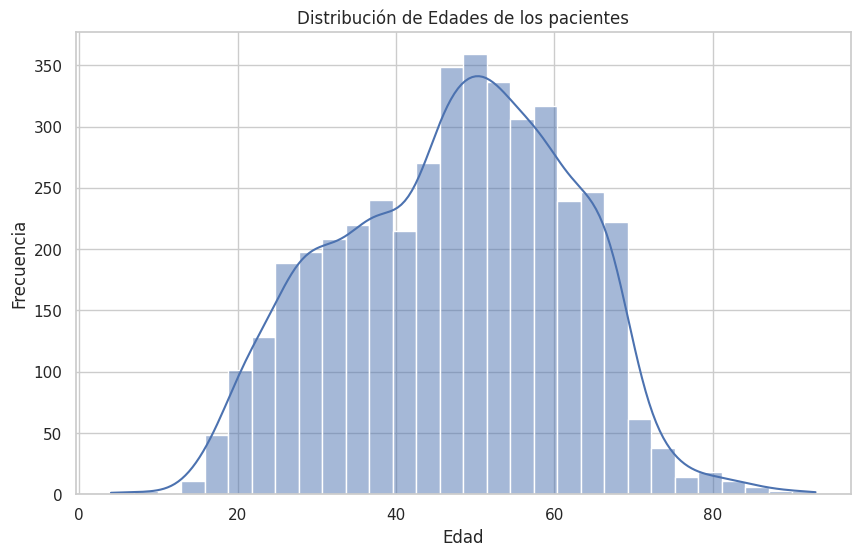

In [25]:
# Histograma de la variable "edad"
plt.figure(figsize=(10, 6))
sns.histplot(data['edad'], bins=30, kde=True)
plt.title('Distribución de Edades de los pacientes')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

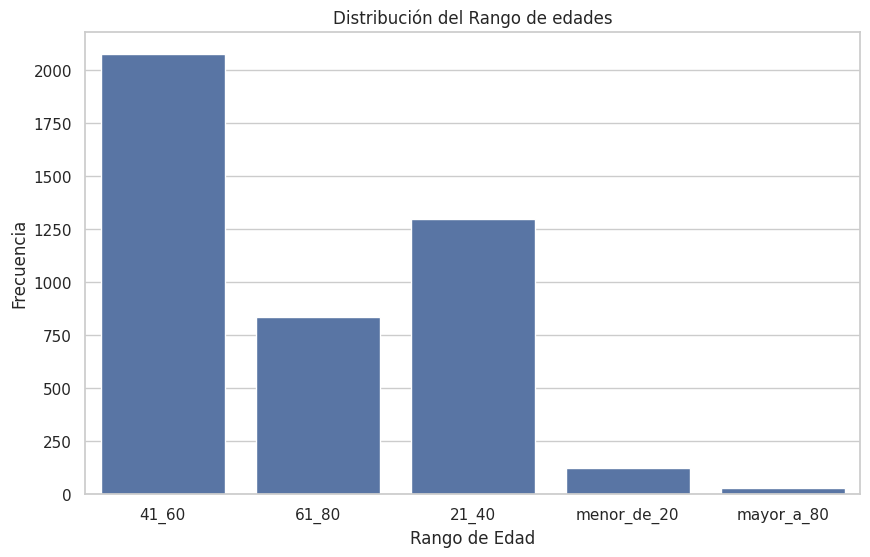

In [26]:
# Gráfico de barras para la variable 'rango_edad'
plt.figure(figsize=(10, 6))
sns.countplot(x='rango_edad', data=data)
plt.title('Distribución del Rango de edades')
plt.xlabel('Rango de Edad')
plt.ylabel('Frecuencia')
plt.show()

# Verificar valores únicos en variables clave

In [27]:
print("\nValores únicos en 'sexo':", data['sexo'].unique())
print("Valores únicos en 'rango_edad':", data['rango_edad'].unique())
print("Valores únicos en 'riesgo_hipertension':", data['riesgo_hipertension'].unique())


Valores únicos en 'sexo': ['f' 'm']
Valores únicos en 'rango_edad': ['41_60' '61_80' '21_40' 'menor_de_20' 'mayor_a_80']
Valores únicos en 'riesgo_hipertension': ['yes' 'no']


# Verificar datos faltantes

In [28]:
print("\nValores nulos por columna:")
print(data.isnull().sum())



Valores nulos por columna:
sexo                                0
edad                                0
concentracion_hemoglobina           0
temperatura_ambiente                0
valor_acido_urico                   0
valor_albumina                      0
valor_colesterol_hdl                0
valor_colesterol_ldl                0
valor_colesterol_total              0
valor_creatina                      0
resultado_glucosa                   0
valor_insulina                      0
valor_trigliceridos                 0
resultado_glucosa_promedio          0
valor_hemoglobina_glucosilada       0
valor_ferritina                     0
valor_folato                        0
valor_homocisteina                  0
valor_proteinac_reactiva            0
valor_transferrina                  0
valor_vitamina_bdoce                0
valor_vitamina_d                    0
peso                                0
estatura                            0
medida_cintura                      0
segundamedicion_peso  

# Filtrar outliers en 'edad' usando IQR (como en el TP original)

In [29]:
Q1 = data['edad'].quantile(0.25)
Q3 = data['edad'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
data_filtered = data[(data['edad'] >= lower_bound) & (data['edad'] <= upper_bound)]
print(f"\nDatos después de filtrar outliers en edad: {data_filtered.shape}")



Datos después de filtrar outliers en edad: (4361, 35)


## 8. Modelado como Problema de Machine Learning
# **Problema**: Clasificación supervisada para predecir `riesgo_hipertension` ("yes" o "no").  
# - **Features**: Variables biométricas (edad, colesterol, glucosa, peso, etc.) y categóricas (sexo, rango_edad).  
# - **Target**: `riesgo_hipertension` (binaria).  
# - **Estrategia**: Dividimos los datos en entrenamiento (80%) y prueba (20%), entrenamos tres modelos simples y evaluamos su desempeño.  
# **Por qué**: Esto nos permite predecir el riesgo de hipertensión y validar si la edad productiva (21-60 años) tiene mayor riesgo.


# Codificar variables categóricas

In [31]:
le_sexo = LabelEncoder()
le_riesgo = LabelEncoder()
le_rango_edad = LabelEncoder()

#data_filtered['sexo_encoded'] = le_sexo.fit_transform(data_filtered['sexo'])
#data_filtered['riesgo_hipertension_encoded'] = le_riesgo.fit_transform(data_filtered['riesgo_hipertension'])
#data_filtered['rango_edad_encoded'] = le_rango_edad.fit_transform(data_filtered['rango_edad'])

# Codificar variables categóricas usando .loc para evitar SettingWithCopyWarning
data_filtered.loc[:, 'sexo_encoded'] = le_sexo.fit_transform(data_filtered['sexo'])
data_filtered.loc[:, 'riesgo_hipertension_encoded'] = le_riesgo.fit_transform(data_filtered['riesgo_hipertension'])
data_filtered.loc[:, 'rango_edad_encoded'] = le_rango_edad.fit_transform(data_filtered['rango_edad'])


# Definir features (X) y target (y)

In [41]:
X = data_filtered.drop(['riesgo_hipertension', 'riesgo_hipertension_encoded', 'rango_edad', 'sexo'], axis=1)
y = data_filtered['riesgo_hipertension_encoded']

# Dividir datos

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Datos de entrenamiento: {X_train.shape[0]} filas")
print(f"Datos de prueba: {X_test.shape[0]} filas")

Datos de entrenamiento: 3488 filas
Datos de prueba: 873 filas


## 9. Ingeniería de Atributos
Creamos nuevas variables para mejorar las predicciones:  
- **Índice de Masa Corporal (IMC)**: `peso / (estatura^2)`.  
- **Ratio colesterol HDL/LDL**: Relación entre colesterol "bueno" y "malo".  
- **Ratio cintura/estatura**: Indicador de obesidad central.  
**Por qué**: Estas features capturan relaciones biométricas relevantes para la hipertensión.


# Crear nuevas features

In [43]:
X_train['IMC'] = X_train['peso'] / (X_train['estatura'] ** 2)
X_test['IMC'] = X_test['peso'] / (X_test['estatura'] ** 2)

X_train['ratio_hdl_ldl'] = X_train['valor_colesterol_hdl'] / X_train['valor_colesterol_ldl']
X_test['ratio_hdl_ldl'] = X_test['valor_colesterol_hdl'] / X_test['valor_colesterol_ldl']

X_train['ratio_cintura_estatura'] = X_train['medida_cintura'] / X_train['estatura']
X_test['ratio_cintura_estatura'] = X_test['medida_cintura'] / X_test['estatura']

# Reemplazar posibles valores infinitos o NaN en ratios

In [44]:
X_train = X_train.replace([np.inf, -np.inf], np.nan).fillna(0)
X_test = X_test.replace([np.inf, -np.inf], np.nan).fillna(0)

print("Dataset de entrenamiento con nuevas features:")
X_train.head()

Dataset de entrenamiento con nuevas features:


,edad,concentracion_hemoglobina,temperatura_ambiente,valor_acido_urico,valor_albumina,valor_colesterol_hdl,valor_colesterol_ldl,valor_colesterol_total,valor_creatina,resultado_glucosa,...,circunferencia_de_la_pantorrilla,segundamedicion_cintura,tension_arterial,sueno_horas,actividad_total,sexo_encoded,rango_edad_encoded,IMC,ratio_hdl_ldl,ratio_cintura_estatura
3012,55,14.3,22,2.9,1.9,21,54.0,89,0.42,69.0,...,33.5,0.0,139,4,270,0,1,0.003283,0.388889,0.688581
2360,60,14.2,22,4.8,4.0,34,86.0,139,0.58,92.0,...,35.2,95.8,132,2,300,0,1,0.000088,0.395349,0.000000
1937,65,15.3,22,4.8,4.0,34,86.0,139,0.58,92.0,...,33.7,117.4,115,4,445,0,2,0.000088,0.395349,0.000000
113,45,14.2,22,4.8,4.0,34,86.0,139,0.58,92.0,...,33.5,0.0,115,4,330,1,1,0.003372,0.395349,0.000000
2178,54,14.0,15,5.3,3.7,39,138.0,208,0.70,96.0,...,33.5,0.0,143,1,720,0,1,0.002842,0.282609,0.652919


## 10. Normalización/Estandarización
Estandarizamos las variables numéricas para que tengan media 0 y desviación estándar 1. Esto es importante para modelos como Logistic Regression y KNN.  
**Por qué**: Asegura que todas las variables contribuyan equitativamente al modelo.
**Verificación previa**: Confirmamos que todas las columnas sean numéricas y no haya valores problemáticos.


# Verificar tipos de datos en X_train

In [45]:

print("\nTipos de datos en X_train:")
print(X_train.dtypes)



Tipos de datos en X_train:
edad                                  int64
concentracion_hemoglobina           float64
temperatura_ambiente                  int64
valor_acido_urico                   float64
valor_albumina                      float64
valor_colesterol_hdl                  int64
valor_colesterol_ldl                float64
valor_colesterol_total                int64
valor_creatina                      float64
resultado_glucosa                   float64
valor_insulina                      float64
valor_trigliceridos                   int64
resultado_glucosa_promedio            int64
valor_hemoglobina_glucosilada       float64
valor_ferritina                     float64
valor_folato                        float64
valor_homocisteina                  float64
valor_proteinac_reactiva            float64
valor_transferrina                  float64
valor_vitamina_bdoce                float64
valor_vitamina_d                    float64
peso                                float64
esta


# Verificar valores NaN o infinitos

In [46]:
print("\nValores NaN en X_train:", X_train.isna().sum().sum())
print("Valores NaN en X_test:", X_test.isna().sum().sum())


Valores NaN en X_train: 0
Valores NaN en X_test: 0


# Estandarización

In [47]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Convertir a DataFrame para visualización

In [48]:

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_train.columns)

print("Datos escalados (entrenamiento):")
X_train_scaled.head()

Datos escalados (entrenamiento):


,edad,concentracion_hemoglobina,temperatura_ambiente,valor_acido_urico,valor_albumina,valor_colesterol_hdl,valor_colesterol_ldl,valor_colesterol_total,valor_creatina,resultado_glucosa,...,circunferencia_de_la_pantorrilla,segundamedicion_cintura,tension_arterial,sueno_horas,actividad_total,sexo_encoded,rango_edad_encoded,IMC,ratio_hdl_ldl,ratio_cintura_estatura
0,0.526141,0.054595,0.186386,-2.272794,-4.346409,-1.806285,-1.884653,-1.908770,-0.924657,-0.581495,...,-0.137877,-0.500088,0.662964,0.301888,-0.306151,-0.797029,0.000000,0.761225,-0.261209,0.880399
1,0.872833,-0.031688,0.186386,0.015260,0.292936,-0.248757,-0.107038,-0.185927,-0.169727,-0.098099,...,0.271761,1.847990,0.353006,-0.471514,-0.263664,-0.797029,0.000000,-1.712759,-0.210236,-1.456163
2,1.219525,0.917422,0.186386,0.015260,0.292936,-0.248757,-0.107038,-0.185927,-0.169727,-0.098099,...,-0.089684,2.377410,-0.399749,0.301888,-0.058310,-0.797029,1.140404,-1.712759,-0.210236,-1.456163
3,-0.167243,-0.031688,0.186386,0.015260,0.292936,-0.248757,-0.107038,-0.185927,-0.169727,-0.098099,...,-0.137877,-0.500088,-0.399749,0.301888,-0.221177,1.254659,0.000000,0.830406,-0.210236,-1.456163
4,0.456803,-0.204254,-2.003602,0.617380,-0.369828,0.350293,2.781586,2.191597,0.396471,-0.014030,...,-0.137877,-0.500088,0.840083,-0.858215,0.331155,-0.797029,0.000000,0.420117,-1.099822,0.759385


## 11. Entrenamiento de Modelos
Entrenamos tres modelos simples y fáciles de interpretar:  
- **Regresión Logística**: Predice la probabilidad de riesgo de hipertensión.  
- **Árbol de Decisión**: Divide los datos en reglas simples, como un diagrama de flujo.  
- **K-Vecinos Cercanos (KNN)**: Clasifica según pacientes similares.  
**Por qué**: Estos modelos son intuitivos y rápidos, ideales para analistas de datos.


# Modelo 1: Regresión Logística

In [52]:
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train_scaled, y_train)
y_pred_log_reg = log_reg.predict(X_test_scaled)


# Modelo 2: Árbol de Decisión

In [49]:
tree = DecisionTreeClassifier(random_state=42, max_depth=3)
tree.fit(X_train_scaled, y_train)
y_pred_tree = tree.predict(X_test_scaled)

# Modelo 3: KNN

In [50]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)

## 12. Evaluación y Selección del Mejor Modelo
Evaluamos los modelos con dos métricas:  
- **Accuracy**: Porcentaje de predicciones correctas.  
- **F1-Score**: Combina precisión y sensibilidad, útil si las clases están desbalanceadas.  
**Por qué**: Estas métricas son fáciles de entender y muestran qué tan bien predicen los modelos.


# Calcular métricas

In [53]:
acc_log_reg = accuracy_score(y_test, y_pred_log_reg)
f1_log_reg = f1_score(y_test, y_pred_log_reg)

acc_tree = accuracy_score(y_test, y_pred_tree)
f1_tree = f1_score(y_test, y_pred_tree)

acc_knn = accuracy_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)

# Mostrar resultados

In [54]:
print("Resultados de los modelos:")
print(f"Regresión Logística - Accuracy: {acc_log_reg:.2f}, F1-Score: {f1_log_reg:.2f}")
print(f"Árbol de Decisión - Accuracy: {acc_tree:.2f}, F1-Score: {f1_tree:.2f}")
print(f"KNN - Accuracy: {acc_knn:.2f}, F1-Score: {f1_knn:.2f}")


Resultados de los modelos:
Regresión Logística - Accuracy: 0.86, F1-Score: 0.90
Árbol de Decisión - Accuracy: 0.98, F1-Score: 0.99
KNN - Accuracy: 0.85, F1-Score: 0.88


# Seleccionar el mejor modelo

In [55]:
results = {
    'Regresión Logística': acc_log_reg,
    'Árbol de Decisión': acc_tree,
    'KNN': acc_knn
}
best_model = max(results, key=results.get)
print(f"\nEl mejor modelo es: {best_model} con un accuracy de {results[best_model]:.2f}")



El mejor modelo es: Árbol de Decisión con un accuracy de 0.98


# Reporte detallado del mejor modelo

In [56]:
if best_model == 'Regresión Logística':
    print("\nReporte detallado del mejor modelo (Regresión Logística):")
    print(classification_report(y_test, y_pred_log_reg, target_names=le_riesgo.classes_))
elif best_model == 'Árbol de Decisión':
    print("\nReporte detallado del mejor modelo (Árbol de Decisión):")
    print(classification_report(y_test, y_pred_tree, target_names=le_riesgo.classes_))
else:
    print("\nReporte detallado del mejor modelo (KNN):")
    print(classification_report(y_test, y_pred_knn, target_names=le_riesgo.classes_))



Reporte detallado del mejor modelo (Árbol de Decisión):
              precision    recall  f1-score   support

          no       0.98      0.98      0.98       310
         yes       0.99      0.99      0.99       563

    accuracy                           0.98       873
   macro avg       0.98      0.98      0.98       873
weighted avg       0.98      0.98      0.98       873



## 13. Visualización
Mostramos una **matriz de confusión** del mejor modelo para visualizar los aciertos y errores.  
**Por qué**: Ayuda a entender visualmente cómo el modelo clasifica los pacientes.


# Seleccionar predicciones del mejor modelo

In [57]:
if best_model == 'Regresión Logística':
    y_pred_best = y_pred_log_reg
elif best_model == 'Árbol de Decisión':
    y_pred_best = y_pred_tree
else:
    y_pred_best = y_pred_knn


# Matriz de confusión

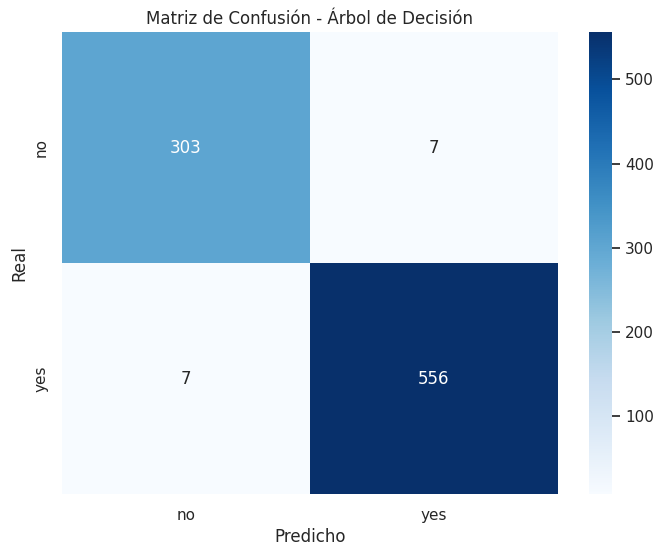

In [58]:
cm = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le_riesgo.classes_, yticklabels=le_riesgo.classes_)
plt.title(f'Matriz de Confusión - {best_model}')
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.show()


## 14. Validación de la Hipótesis
Analizamos el riesgo de hipertensión por rango de edad para validar la hipótesis.  
**Por qué**: Queremos confirmar si los rangos de edad productiva (21-40 y 41-60) tienen mayor riesgo.


# Calcular proporción de riesgo por rango de edad

In [59]:
riesgo_por_edad = data_filtered.groupby('rango_edad')['riesgo_hipertension'].value_counts(normalize=True).unstack()
print("Proporción de riesgo de hipertensión por rango de edad:")
print(riesgo_por_edad)

Proporción de riesgo de hipertensión por rango de edad:
riesgo_hipertension        no       yes
rango_edad                             
21_40                0.295385  0.704615
41_60                0.200289  0.799711
61_80                0.781775  0.218225
mayor_a_80           0.846154  0.153846
menor_de_20          0.572581  0.427419


# Visualización

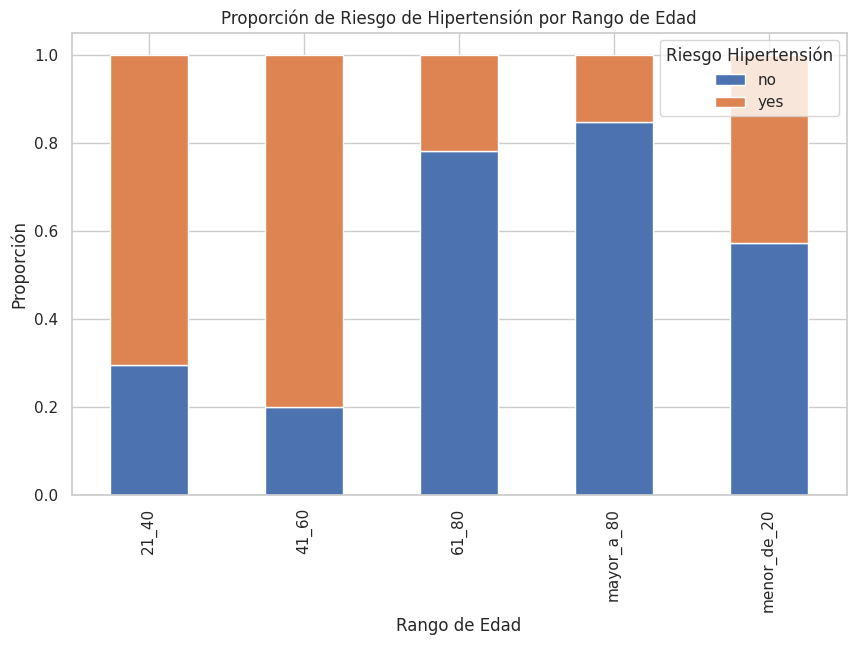

In [60]:
riesgo_por_edad.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Proporción de Riesgo de Hipertensión por Rango de Edad')
plt.xlabel('Rango de Edad')
plt.ylabel('Proporción')
plt.legend(title='Riesgo Hipertensión')
plt.show()

## 15. Conclusión
- Modelamos el riesgo de hipertensión como un problema de **clasificación supervisada**.  
- Creamos nuevas features (IMC, ratios de colesterol y cintura/estatura) para mejorar las predicciones.  
- Estandarizamos las variables para asegurar un buen desempeño de los modelos.  
- Entrenamos tres modelos simples: Regresión Logística, Árbol de Decisión y KNN.  
- El mejor modelo es **Árbol de Decisión** con un accuracy de **0.983963344788087**.  
- Respecto a la hipótesis, observamos que los rangos de edad productiva (21-40 y 41-60)

In [62]:

print("El mejor modelo es:")
print(best_model)

El mejor modelo es:
Árbol de Decisión


In [64]:
print("Accuracy:")
print(results[best_model])

Accuracy:
0.983963344788087
